# Rozpoznawanie gestów dłoni

In [3]:
import os
import cv2
import pathlib
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import mediapipe as mp
from glob import glob
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

### Przetwarzanie danych

Wyświetlenie liczby zdjęć dla każdej kategorii

In [4]:
data_path = './asl_alphabet_train/asl_alphabet_train'
categories = os.listdir(data_path)

list_of_size = []
for category in categories:
    print(category, len(glob(os.path.join(data_path, category, '*.jpg'))))
    # sprawdzenie, czy wszystkie obrazy mają ten sam rozmiar
    # list_of_size += [cv2.imread(im).shape for im in glob(os.path.join(data_path, category, '*.jpg'))]
    # print(set(list_of_size))


A 3000
B 3000
C 3000
D 3000
del 3000
E 3000
F 3000
G 3000
H 3000
I 3000
J 3000
K 3000
L 3000
M 3000
N 3000
nothing 3000
O 3000
P 3000
Q 3000
R 3000
S 3000
space 3000
T 3000
U 3000
V 3000
W 3000
X 3000
Y 3000
Z 3000


Przetwarzanie zdjęć w punkty wykorzystując model mediapipe Hands (około 90 minut)

In [13]:
from tqdm import tqdm

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

# Ścieżka do folderu z danymi
input_folder = "./asl_alphabet_train/asl_alphabet_train"
output_csv = "handpoints.csv"

data = []

# Iteracja po wszystkich obrazach w folderze
for label in os.listdir(input_folder):
    if label == 'nothing':
        continue
    label_path = os.path.join(input_folder, label)
    if os.path.isdir(label_path):
        for image_name in tqdm(os.listdir(label_path), desc=f"Etykieta {label}"):
            image_path = os.path.join(label_path, image_name)
            image = cv2.imread(image_path)
            if image is None:
                continue
            
            # MediaPipe wymaga obrazu RGB
            rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = hands.process(rgb_image)
            
            if results.multi_hand_landmarks:
                # Pobierz współrzędne kluczowych punktów
                landmarks = results.multi_hand_landmarks[0]
                keypoints = []
                for lm in landmarks.landmark:
                    keypoints.extend([lm.x, lm.y, lm.z])  # Dodaj współrzędne x, y, z
                
                data.append([label] + keypoints)

# Zapisanie danych do pliku CSV
columns = ["label"] + [f"keypoint_{i}" for i in range(63)]
df = pd.DataFrame(data, columns=columns)
df.to_csv(output_csv, index=False)
print(f"Dane zapisane w {output_csv}")


Etykieta Z: 100%|██████████| 3000/3000 [03:42<00:00, 13.47it/s]


Dane zapisane w handpoints.csv


Sprawdzenie przetworzonych danych

In [20]:
df = pd.read_csv('handpoints.csv')

In [22]:
df.groupby("label").count()

,keypoint_0,keypoint_1,keypoint_2,keypoint_3,keypoint_4,keypoint_5,keypoint_6,keypoint_7,keypoint_8,keypoint_9,...,keypoint_53,keypoint_54,keypoint_55,keypoint_56,keypoint_57,keypoint_58,keypoint_59,keypoint_60,keypoint_61,keypoint_62
label,,,,,,,,,,,,,,,,,,,,,
A,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,...,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187
B,2207,2207,2207,2207,2207,2207,2207,2207,2207,2207,...,2207,2207,2207,2207,2207,2207,2207,2207,2207,2207
C,1988,1988,1988,1988,1988,1988,1988,1988,1988,1988,...,1988,1988,1988,1988,1988,1988,1988,1988,1988,1988
D,2463,2463,2463,2463,2463,2463,2463,2463,2463,2463,...,2463,2463,2463,2463,2463,2463,2463,2463,2463,2463
E,2308,2308,2308,2308,2308,2308,2308,2308,2308,2308,...,2308,2308,2308,2308,2308,2308,2308,2308,2308,2308
F,2876,2876,2876,2876,2876,2876,2876,2876,2876,2876,...,2876,2876,2876,2876,2876,2876,2876,2876,2876,2876
G,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,...,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440
H,2393,2393,2393,2393,2393,2393,2393,2393,2393,2393,...,2393,2393,2393,2393,2393,2393,2393,2393,2393,2393
I,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384,...,2384,2384,2384,2384,2384,2384,2384,2384,2384,2384


### Podział na dane treningowe, walidacyjne i testowe

In [23]:
X = df.drop("label", axis=1).values
y = df["label"].values
print(X.shape)
print(y.shape)

(63673, 63)
(63673,)


In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [30]:
# Krok 1: Podział na dane treningowe i testowo-walidacyjne (70% / 30%)
X_train, X_test_val, y_train, y_test_val = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Krok 2: Podział danych testowo-walidacyjnych na testowe i walidacyjne (15% / 15%)
X_test, X_val, y_test, y_val = train_test_split(
    X_test_val, y_test_val, test_size=0.5, random_state=42, stratify=y_test_val
)

In [31]:
def print_class_distribution(labels, dataset_name):
    unique, counts = np.unique(labels, return_counts=True)
    print(f"Rozkład klas w zbiorze {dataset_name}:")
    for label, count in zip(unique, counts):
        print(f"{label_encoder.inverse_transform([label])[0]}: {count}")
    print("\n")

print_class_distribution(y_train, "treningowym")
print_class_distribution(y_val, "walidacyjnym")
print_class_distribution(y_test, "testowym")

Rozkład klas w zbiorze treningowym:
A: 1531
B: 1545
C: 1392
D: 1724
E: 1616
F: 2013
G: 1708
H: 1675
I: 1669
J: 1805
K: 1890
L: 1769
M: 1095
N: 893
O: 1585
P: 1429
Q: 1465
R: 1779
S: 1786
T: 1644
U: 1761
V: 1784
W: 1719
X: 1511
Y: 1809
Z: 1646
del: 1191
space: 1137


Rozkład klas w zbiorze walidacyjnym:
A: 328
B: 331
C: 298
D: 369
E: 346
F: 431
G: 366
H: 359
I: 357
J: 387
K: 405
L: 379
M: 235
N: 192
O: 340
P: 306
Q: 314
R: 381
S: 383
T: 353
U: 378
V: 382
W: 368
X: 324
Y: 388
Z: 352
del: 255
space: 244


Rozkład klas w zbiorze testowym:
A: 328
B: 331
C: 298
D: 370
E: 346
F: 432
G: 366
H: 359
I: 358
J: 386
K: 405
L: 379
M: 235
N: 191
O: 340
P: 307
Q: 314
R: 381
S: 382
T: 352
U: 377
V: 382
W: 369
X: 323
Y: 388
Z: 353
del: 255
space: 244




### Stworzenie modelu Sequential

In [35]:
from tensorflow.keras import Sequential # type: ignore
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation # type: ignore

model = Sequential([
    Input((X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3137 - loss: 2.3575 - val_accuracy: 0.8870 - val_loss: 0.4898
Epoch 2/20
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8100 - loss: 0.6128 - val_accuracy: 0.9414 - val_loss: 0.2820
Epoch 3/20
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8806 - loss: 0.4027 - val_accuracy: 0.9441 - val_loss: 0.2214
Epoch 4/20
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9062 - loss: 0.3165 - val_accuracy: 0.9467 - val_loss: 0.1827
Epoch 5/20
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9201 - loss: 0.2684 - val_accuracy: 0.9439 - val_loss: 0.1714
Epoch 6/20
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9277 - loss: 0.2404 - val_accuracy: 0.9674 - val_loss: 0.1402
Epoch 7/20
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9336 - loss: 0.2216 - val_accuracy: 0.9681 - val_loss: 0.1303
Epoch 8/20
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9388 - loss: 0.

In [ ]:
model.save("asl_model_handpoints.keras")

### Ewaluacja modelu

In [38]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Dokładność na danych testowych: {test_accuracy * 100:.2f}%")

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9768 - loss: 0.0822
Dokładność na danych testowych: 97.61%


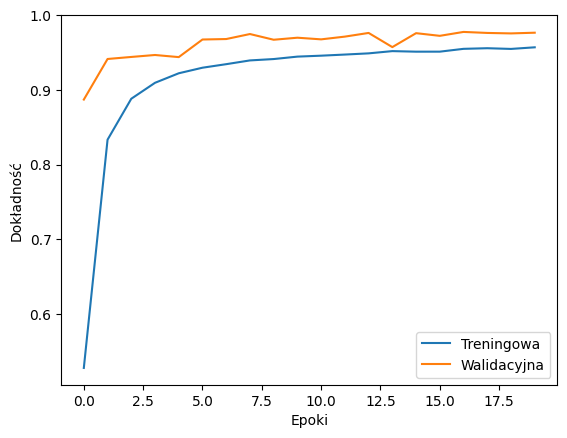

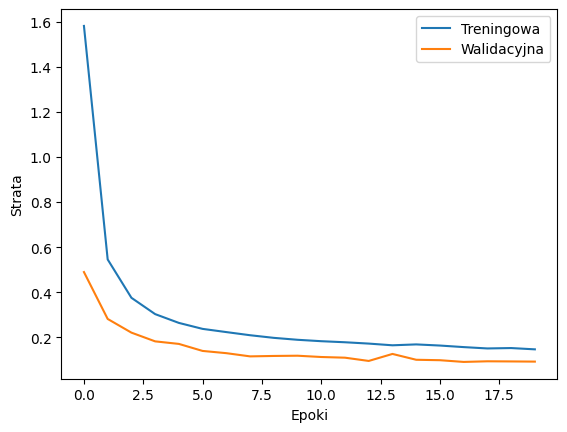

In [50]:
# Wykres dokładności
plt.plot(history.history['accuracy'], label='Treningowa')
plt.plot(history.history['val_accuracy'], label='Walidacyjna')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

# Wykres strat
plt.plot(history.history['loss'], label='Treningowa')
plt.plot(history.history['val_loss'], label='Walidacyjna')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

In [55]:
predictions = model.predict(X_test, verbose=0)
predicted_classes = np.argmax(predictions, axis=-1)
print(predicted_classes)
print(y_test)

[10 18  5 ... 24 17 26]
[10 12  5 ... 24 17 26]


In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       328
           1       0.99      1.00      0.99       331
           2       0.97      1.00      0.99       298
           3       1.00      0.98      0.99       370
           4       0.99      0.99      0.99       346
           5       0.99      0.99      0.99       432
           6       0.99      0.99      0.99       366
           7       0.99      1.00      0.99       359
           8       0.99      0.97      0.98       358
           9       1.00      0.98      0.99       386
          10       0.99      0.98      0.99       405
          11       1.00      1.00      1.00       379
          12       0.76      0.96      0.85       235
          13       0.98      0.65      0.78       191
          14       0.99      0.99      0.99       340
          15       0.99      0.97      0.98       307
          16       0.98      0.99      0.98       314
          17       0.99    

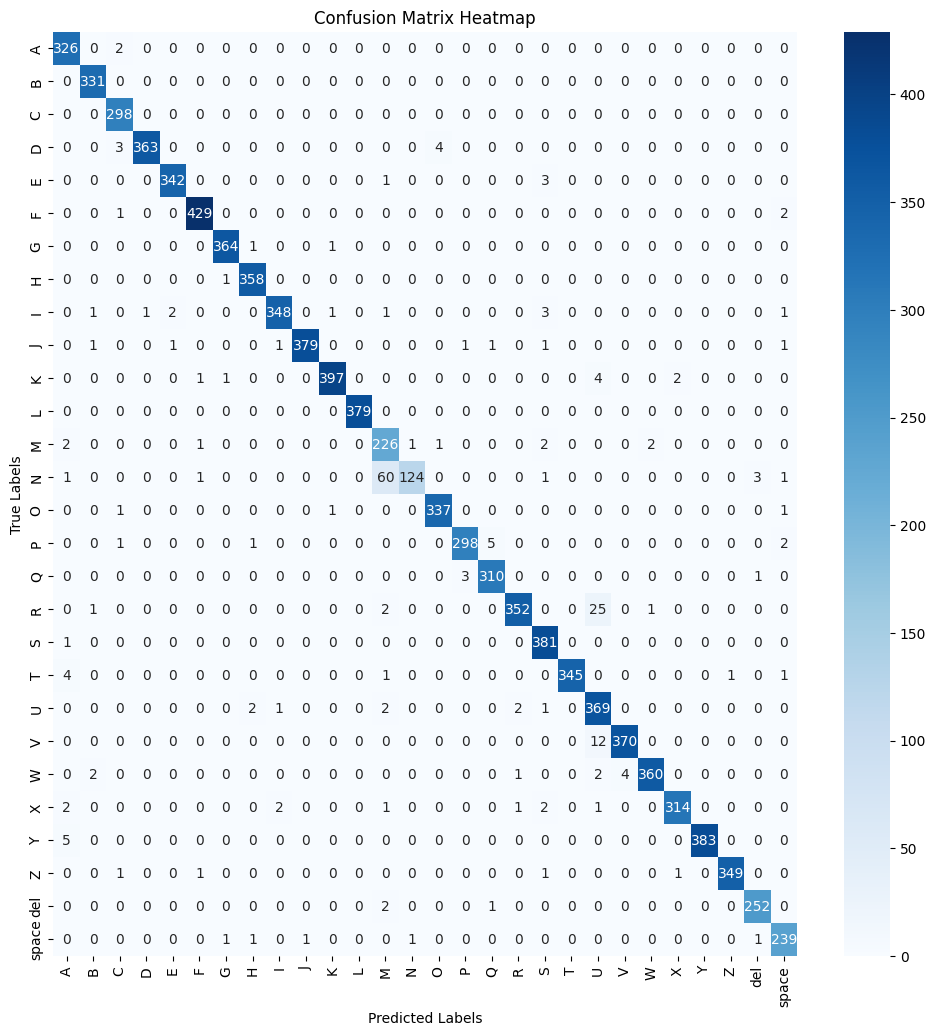

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Create the heatmap plot
plt.figure(figsize=(12, 12))  # Set figure size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(list(set(y))), yticklabels=sorted(list(set(y))))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Display the plot
plt.show()

### Testowanie modelu

In [ ]:
def preprocess_new_image(image_path):
    """
    Przetwarza nowe zdjęcie (z pliku) do formatu akceptowanego przez model.
    - image_path: ścieżka do zdjęcia.
    """
    # Wczytaj obraz
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Nie można wczytać obrazu: {image_path}")
    
    # Użyj MediaPipe do wyciągnięcia kluczowych punktów dłoni
    import mediapipe as mp
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

    # Konwersja na RGB (MediaPipe wymaga RGB)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb_image)

    if results.multi_hand_landmarks:
        # Pobierz współrzędne kluczowych punktów
        landmarks = results.multi_hand_landmarks[0]
        keypoints = []
        for lm in landmarks.landmark:
            keypoints.extend([lm.x, lm.y, lm.z])  # Dodaj współrzędne x, y, z

        # Konwersja do formatu NumPy
        keypoints = np.array(keypoints).reshape(1, -1)  # 1 próbka, wiele cech
        return keypoints
    else:
        raise ValueError("Nie wykryto dłoni na obrazie.")

def predict_label(image_path):
    """
    Przewiduje etykietę dla nowego zdjęcia za pomocą wytrenowanego modelu.
    - image_path: ścieżka do zdjęcia.
    """
    try:
        # Przetwarzanie obrazu
        keypoints = preprocess_new_image(image_path)

        # Przewidywanie etykiety
        predictions = model.predict(keypoints)
        predicted_label_index = np.argmax(predictions)
        predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]

        return predicted_label, predictions[0]
    except Exception as e:
        print(f"Błąd: {e}")
        return None, None


# Wczytaj klasy
classes = pd.read_csv("handpoints.csv")["label"].unique()
label_encoder = LabelEncoder()
label_encoder.fit(classes)

# Podaj ścieżkę do zdjęcia
test_img_path = r".\asl_alphabet_test\asl_alphabet_test\space_test.jpg"
result, _ = predict_label(test_img_path)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
space
